In [1]:
from exp.utils import *
from exp.models import *
from tqdm.notebook import tqdm
from multiprocessing import Pool

import torch
import torch.nn as NN
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [2]:
seed = 92
seed_everything(seed)

In [3]:
model_name = "py_densenet121_v1"
bs = 16
epochs = 10
image_size = (228, 228)
device = get_device()
lr = 3e-3
sigmoid = NN.Sigmoid()
labels = get_labels()

Using the GPU!


In [4]:
train_df, valid_df, test_df = get_dataframes(include_labels=labels, small=True)
train_df.shape, valid_df.shape, test_df.shape

/home/favi/work/crx8/exp/utils.py:163: UserWarning: Train-Val-Split currently with patient overlap!
  warnings.warn("Train-Val-Split currently with patient overlap!")


((6921, 24), (1730, 24), (2559, 24))

In [5]:
train_label = train_df[labels].values
pos_weights = compute_positive_class_weigths(train_label)

In [6]:
train_tfs = transforms.Compose([
    transforms.Normalize([SUBSET_MEAN]*3, [SUBSET_STD]*3),
    #transforms.RandomHorizontalFlip(p=0.5)
])
test_tfs = transforms.Compose([
    transforms.Normalize([SUBSET_MEAN]*3, [SUBSET_STD]*3),
    
])

In [7]:
train_ds = CRX8_Data(train_df, get_image_path(), labels, image_size=image_size, transforms=train_tfs)
valid_ds = CRX8_Data(valid_df, get_image_path(), labels, image_size=image_size, transforms=test_tfs)
test_ds  = CRX8_Data(test_df , get_image_path(), labels, image_size=image_size, transforms=test_tfs)

In [8]:
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=bs, shuffle=False)
test_dl  = DataLoader(test_ds,  batch_size=bs, shuffle=False)

dataloaders = {
    "train": train_dl,
    "val": valid_dl,
    "test": test_dl
}

In [9]:
#criterion = NN.BCEWithLogitsLoss(pos_weight=pos_weights.to(device), 
#                                 reduction="mean")
criterion = NN.BCEWithLogitsLoss(reduction="mean")

In [10]:
model = pretrained_densenet121(labels=labels)
model = model.to(device)

In [11]:
transfer_optimizer = transfer_learn_setup(model, "densenet", lr)

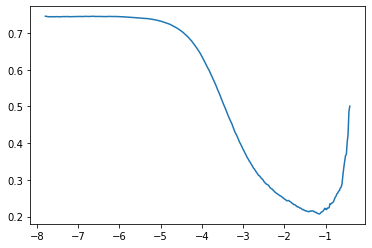

In [12]:
logs,losses = find_lr(model, train_dl, transfer_optimizer, criterion, device=device)
i = 10
plt.plot(logs[i:-i],losses[i:-i]);

In [12]:
lr = 1e-2

In [13]:
transfer_optimizer = transfer_learn_setup(model, "densenet", lr)

In [14]:
logger = Logger()
logger.add_metric("loss")
logger.add_metric("acc")
logger.add_metric("auroc")

In [15]:
num_steps = len(train_dl)
lr_range = (lr / 10, lr)
scheduler = OneCycleLR(transfer_optimizer, num_steps, lr_range)

In [17]:
model = train_model(model, criterion, transfer_optimizer, scheduler, 
                    dataloaders, logger, model_name, labels=labels,
                    num_epochs=epochs, device=device)

""


""


""


""


""


""


""


""


""


""


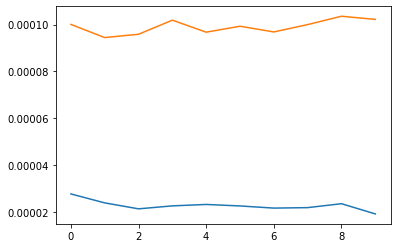

In [18]:
logger.plot_losses()

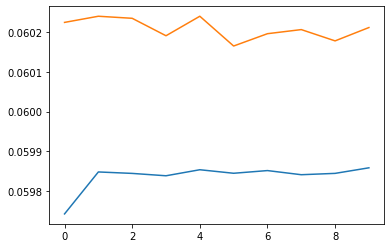

In [19]:
logger.plot_acc()

In [20]:
logger.plot_auroc()

,py_densenet121_v1_e0,py_densenet121_v1_e0,py_densenet121_v1_e1,py_densenet121_v1_e2,py_densenet121_v1_e3,py_densenet121_v1_e4,py_densenet121_v1_e5,py_densenet121_v1_e6,py_densenet121_v1_e7,py_densenet121_v1_e8,py_densenet121_v1_e9,CheXNet
Effusion,0.679131,0.679131,0.696750,0.696295,0.690306,0.694885,0.691413,0.692634,0.689764,0.690014,0.683953,0.8638
Infiltration,0.608348,0.608348,0.620465,0.619563,0.616483,0.616850,0.609722,0.609146,0.604842,0.604610,0.606352,0.7345
Edema,0.617822,0.617822,0.699801,0.707182,0.705489,0.685243,0.678787,0.660211,0.661046,0.671158,0.682399,0.8878
Nodule,0.540292,0.540292,0.524113,0.518212,0.497592,0.520974,0.524157,0.512469,0.515311,0.497476,0.511760,0.7802
Consolidation,0.669917,0.669917,0.672440,0.677786,0.683774,0.658810,0.662690,0.659167,0.657774,0.638405,0.651619,0.7901
Fibrosis,0.647725,0.647725,0.649383,0.656161,0.668184,0.635702,0.622335,0.608528,0.603114,0.606115,0.592937,0.8047
Atelectasis,0.663367,0.663367,0.660586,0.664080,0.648842,0.638797,0.637510,0.630184,0.628470,0.614519,0.628717,0.8094
Emphysema,0.558672,0.558672,0.611041,0.622718,0.635711,0.644379,0.646643,0.652588,0.643772,0.652496,0.633760,0.9371
Mass,0.529949,0.529949,0.546515,0.570339,0.557274,0.566365,0.571035,0.560210,0.573656,0.577670,0.566076,0.8676
Pneumonia,0.464991,0.464991,0.505168,0.520037,0.519865,0.500326,0.506301,0.541362,0.515436,0.514165,0.514886,0.7680


In [21]:
fine_optimizer = fine_tune_setup(model, lr)

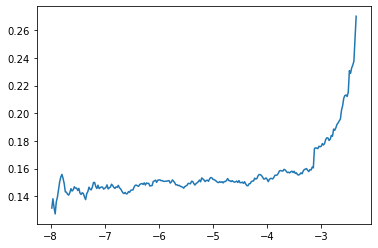

In [23]:
#logs,losses = find_lr(model, train_dl, fine_optimizer, criterion, device=device)
i = 1
plt.plot(logs[i:-i],losses[i:-i]);

In [24]:
lr = 3e-6

In [25]:
fine_optimizer = fine_tune_setup(model, lr)
num_steps = len(train_dl)
lr_range = (lr / 10, lr)
scheduler = OneCycleLR(fine_optimizer, num_steps, lr_range)

In [26]:
logger = Logger()
logger.add_metric("loss")
logger.add_metric("acc")
logger.add_metric("auroc")

In [27]:
model = train_model(model, criterion, fine_optimizer, scheduler, 
                    dataloaders, logger, model_name, labels=labels,
                    num_epochs=epochs, device=device)

""


""


""


""


""


""


""


""


""


""


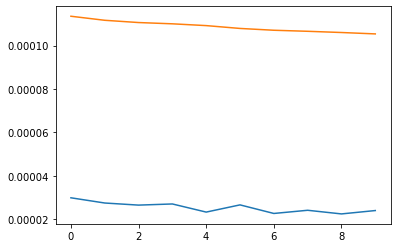

In [28]:
logger.plot_losses()

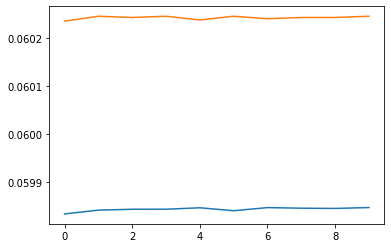

In [29]:
logger.plot_acc()

In [30]:
logger.plot_auroc()

,py_densenet121_v1_e0,py_densenet121_v1_e0,py_densenet121_v1_e1,py_densenet121_v1_e2,py_densenet121_v1_e3,py_densenet121_v1_e4,py_densenet121_v1_e5,py_densenet121_v1_e6,py_densenet121_v1_e7,py_densenet121_v1_e8,py_densenet121_v1_e9,CheXNet
Effusion,0.611099,0.611099,0.624823,0.625373,0.632844,0.638394,0.647567,0.646767,0.651123,0.659966,0.672229,0.8638
Infiltration,0.542700,0.542700,0.538099,0.552955,0.555018,0.554527,0.558889,0.563840,0.561574,0.573101,0.581311,0.7345
Edema,0.535685,0.535685,0.522097,0.553697,0.546158,0.580241,0.555322,0.590646,0.582634,0.601594,0.612067,0.8878
Nodule,0.563343,0.563343,0.564124,0.562721,0.567885,0.576318,0.570984,0.566156,0.573656,0.563176,0.547149,0.7802
Consolidation,0.584643,0.584643,0.616071,0.628369,0.617321,0.652667,0.660190,0.642417,0.660179,0.663429,0.686107,0.7901
Fibrosis,0.612766,0.612766,0.607143,0.612620,0.592496,0.598770,0.597406,0.605842,0.597616,0.586894,0.602107,0.8047
Atelectasis,0.514798,0.514798,0.528726,0.538775,0.547584,0.556624,0.567401,0.566527,0.577154,0.578047,0.593608,0.8094
Emphysema,0.538556,0.538556,0.580076,0.566199,0.547519,0.559592,0.566770,0.569107,0.567635,0.574223,0.589756,0.9371
Mass,0.542909,0.542909,0.538088,0.545195,0.543145,0.547264,0.557741,0.567209,0.566024,0.566956,0.580290,0.8676
Pneumonia,0.451358,0.451358,0.432025,0.404828,0.423337,0.460595,0.442189,0.418701,0.442327,0.408605,0.431647,0.7680
